In [1]:
import sys, os, glob
import ROOT as rt, numpy as np, uproot as ur

path_prefix = os.getcwd() + '/../'
if(path_prefix not in sys.path): sys.path.append(path_prefix)
from util import qol_util as qu

Welcome to JupyROOT 6.22/02


In [2]:
rt.gStyle.SetOptStat(0)
ps = qu.PlotStyle('dark')
ps.SetStyle()

datafiles = glob.glob('pion/*.root')
layers = ['EMB1','EMB2','EMB3','TileBar0','TileBar1','TileBar2']
treename = 'ClusterTree'
hists = {}
colors = [rt.kRed, ps.curve, rt.kGreen]

In [3]:
for i, datafile in enumerate(datafiles):
    f = ur.open(datafile)
    t = f[treename]
    
    ims = {layer: t[layer].array().to_numpy() for layer in layers}
    
    # get sums of the images
    im_sums = {layer: np.sum(im, axis=(1,2)) for layer,im in ims.items()}
    
    # now collapse into a list of sums, one per cluster (collapse along calo layers)
    sums = np.sum([im_sums[layer] for layer in layers],axis=0)
    l = t.num_entries
    assert(len(sums.shape) == 1 and sums.shape[0] == l) # quick check that the above steps were OK
    
    h = rt.TH1F(qu.RN(), 'Sum of (EMB1,EMB2...TileBar2);Sum;% Count', 80, 0., 1.6)
    
    for entry in sums:
        h.Fill(entry)
    
    h.SetLineColor(colors[i%len(colors)])
    h.Scale(1./h.Integral())
    hists[datafile] = h
    f.close()

Info in <TCanvas::Print>: png file image_norm_check.png has been created


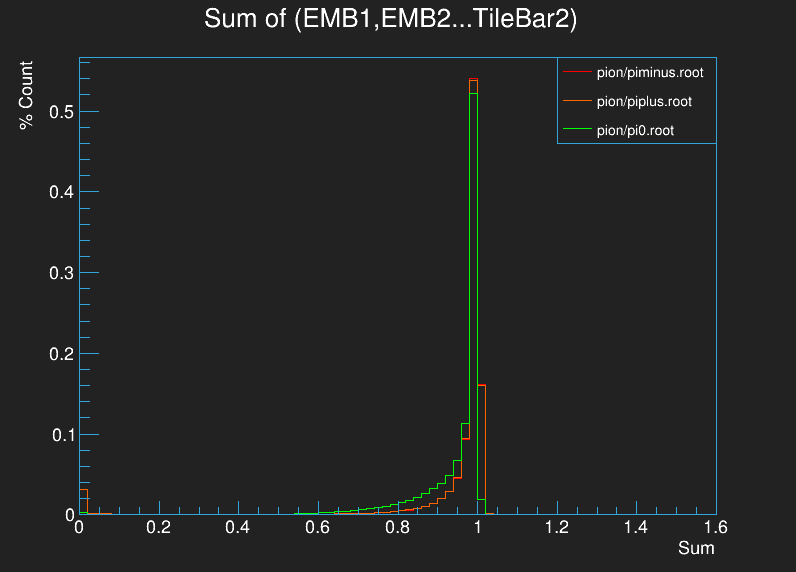

In [5]:
c = rt.TCanvas(qu.RN(),'c',800,600)
stack = rt.THStack()
stack.SetTitle('Sum of (EMB1,EMB2...TileBar2);Sum;% Count')

leg = rt.TLegend(0.7,0.75,0.9,0.9)
leg.SetTextColor(ps.text)

for key,hist in hists.items():
    leg.AddEntry(hist,key,'l')
    stack.Add(hist)
    
stack.Draw('NOSTACK HIST')
leg.Draw()
c.Draw()
c.SaveAs('image_norm_check.png')